In [11]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("boston_housing.csv")

In [4]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 [==============================] - 3s 73ms/step - loss: 590.1907 - mae: 22.4411 - val_loss: 607.0725 - val_mae: 22.7110
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 549.3817 - mae: 21.4784 - val_loss: 557.0169 - val_mae: 21.5516
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 488.1863 - mae: 19.9508 - val_loss: 477.8989 - val_mae: 19.5688
Epoch 4/100
11/11 [==============================] - 0s 15ms/step - loss: 399.0954 - mae: 17.4334 - val_loss: 368.0254 - val_mae: 16.3747
Epoch 5/100
11/11 [==============================] - 0s 15ms/step - loss: 287.4674 - mae: 13.9912 - val_loss: 244.4977 - val_mae: 12.2482
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 185.0701 - mae: 10.7175 - val_loss: 154.8023 - val_mae: 8.6610
Epoch 7/100
11/11 [==============================] - 0s 14ms/step - loss: 133.8057 - mae: 8.9494 - val_loss: 124.1669 - val_mae: 8.0872
Epoch 8/100
11/11 [==================

In [8]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 6ms/step - loss: 21.1584 - mae: 2.9822
Mean squared error on test data:  21.158357620239258
Mean absolute error on test data:  2.982220411300659


In [9]:
# Make predictions
y_pred = model.predict(X_test)
# View the first prediction
y_pred[0]

5/5 [==============================] - 0s 3ms/step


array([14.022772], dtype=float32)

<Axes: >

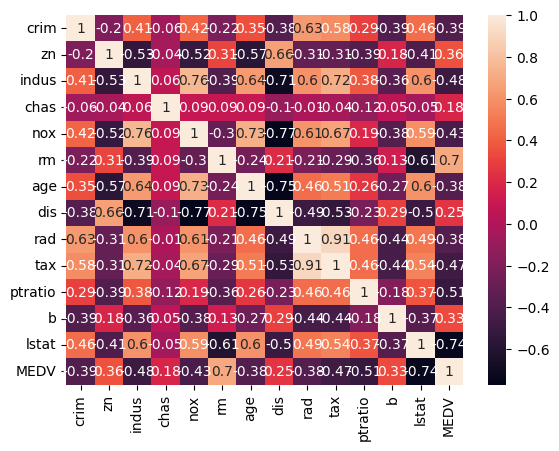

In [17]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


ValueError: continuous is not supported